In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
from skimage.feature import hog
from sklearn.ensemble import RandomForestClassifier ,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from skimage.util import random_noise
from skimage import feature
import pandas as pd
from sklearn.model_selection import learning_curve
from collections import defaultdict
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [2]:
Xtr=np.loadtxt("TrainData.csv") 
Ytr=np.loadtxt("TrainLabels.csv") 
print(Ytr.shape)
print(Xtr.shape)

(12000,)
(12000, 784)


In [ ]:
#Piilow edge detection
def Extract_Features(examples):
    lst=[]
    for image in examples:
        image=Image.fromarray(image.reshape(28,28))
        image=image.convert("L")
        image = image.filter(ImageFilter.FIND_EDGES)
        arr=np.array(image)
        arr=arr.reshape(-1)
        lst.append(arr)
    return lst
vectors=Extract_Features(Xtr) 
print(Xtr.shape)

(12000, 784)


In [5]:
#Canny edge detection
def Extract_Features_canny(examples,sig):
    lst=[]
    for image in examples:
        #edges1 = feature.canny(image.reshape(28,28))
        edges2 = feature.canny(image.reshape(28,28), sigma=sig)
        arr=np.array(edges2)
        arr=arr.reshape(-1)
        lst.append(arr)
    return lst
vectors=Extract_Features_canny(Xtr,1) 
print(Xtr.shape)

(12000, 784)


In [7]:
#HOG
def Extract_Features_Hog(examples,o,c,b):
    lst=[]
    for image in examples:
        fd, hog_image = hog(image.reshape(28,28), orientations=o, pixels_per_cell=(c, b), cells_per_block=(c, b), visualize=True, multichannel=False)
        arr=np.array(hog_image)
        arr=arr.reshape(-1)
        lst.append(arr)
    return lst
vectors=Extract_Features_Hog(Xtr,9,2,2) 
print(Xtr.shape)

(12000, 784)


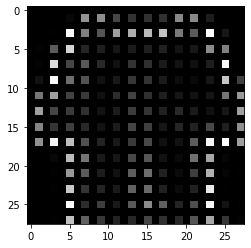

-1.0


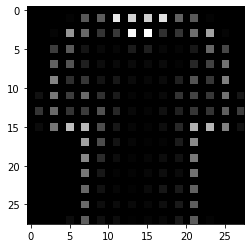

1.0


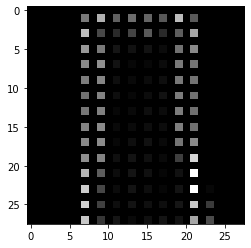

1.0


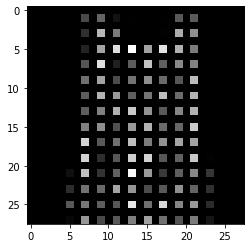

1.0


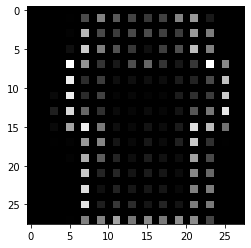

1.0


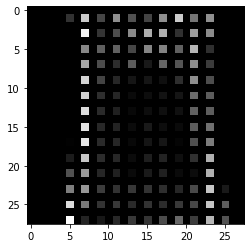

-1.0


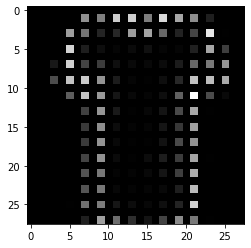

1.0


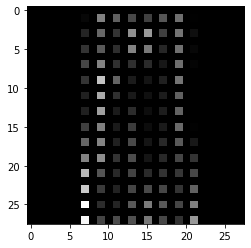

1.0


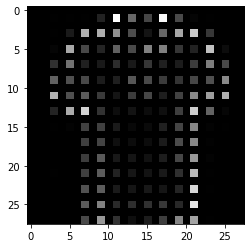

1.0


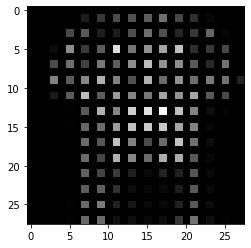

1.0


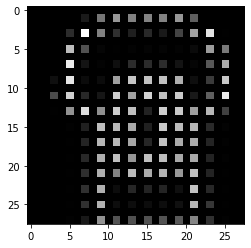

1.0


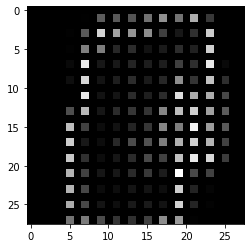

1.0


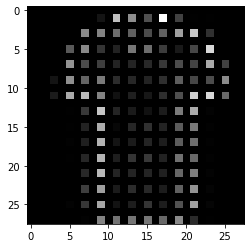

-1.0


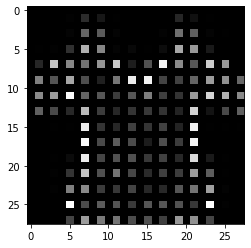

-1.0


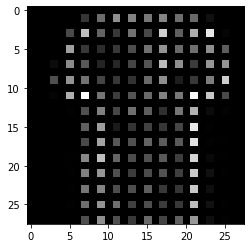

1.0


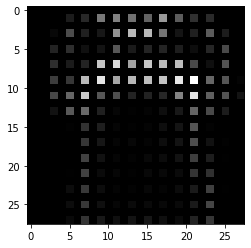

1.0


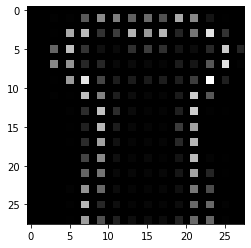

1.0


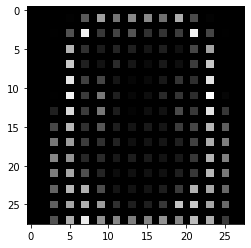

-1.0


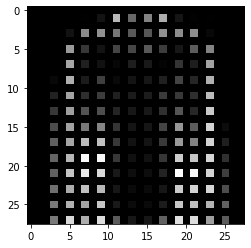

-1.0


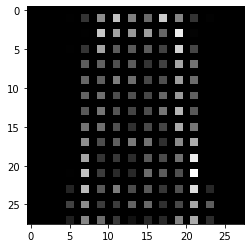

1.0


In [8]:
#Visualization
for x in range(20):
    plt.figure()
    plt.imshow(vectors[x].reshape(28,28),cmap='gray') 
    plt.show() 
    print(Ytr[x])

In [ ]:

#Canny Sigma optimization
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5,random_state=None, shuffle=False)
hyper_params={
    "sigma":[0]
}
canny_models_result =  list()
canny_hyperameter_result=list()
for train_index, test_index in kfold.split(Xtr):
    X_train, X_test = Xtr[train_index], Xtr[test_index]
    y_train, y_test = Ytr[train_index], Ytr[test_index]
    hyper_params["sigma"] = [0,1,2,3,4]
    print("fold")
    for i in hyper_params["sigma"]:
        print(i)
        xtr_vector=Extract_Features_canny(X_train,i)
        xte_vector=Extract_Features_canny(X_test,i)
        rf = RandomForestClassifier()
        rf2 = rf.fit(xtr_vector, y_train)
        y_pred=rf2.predict(xte_vector)
        canny_models_result.append(accuracy_score(y_test, y_pred))
        canny_hyperameter_result.append(i)




fold
0
1
2
3
4
fold
0
1
2
3
4
fold
0
1
2
3
4
fold
0
1
2
3
4
fold
0
1
2
3
4


In [ ]:
#Best Models
for x in canny_models_result:
    print(x)

0.8170833333333334
0.8470833333333333
0.83375
0.8195833333333333
0.8183333333333334
0.8066666666666666
0.8416666666666667
0.8354166666666667
0.83375
0.8170833333333334
0.80125
0.8391666666666666
0.8275
0.8170833333333334
0.8154166666666667
0.7145833333333333
0.725
0.72
0.7083333333333334
0.69625
0.6625
0.6791666666666667
0.67875
0.6745833333333333
0.66375


In [ ]:
#HOD Hyperperameter Optimisation
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5,random_state=None, shuffle=True)
hyper_params={
    "orientations":[1],
    "pixels_per_cell":[1],
    "pixels_per_block":[1]
}
models_result =  list()
hyperameter_result=list()
for train_index, test_index in kfold.split(Xtr):
    X_train, X_test = Xtr[train_index], Xtr[test_index]
    y_train, y_test = Ytr[train_index], Ytr[test_index]
    hyper_params["pixels_per_cell"] = [2,3,4]
    hyper_params["pixels_per_block"] = [2,3,4]
    hyper_params["orientations"] = [3,6,9]
    print("fold")
    for i in hyper_params["orientations"]:
        for x in hyper_params["pixels_per_cell"]:
            for y in hyper_params["pixels_per_block"]:
                print(str(i)+"    "+str(x)+"   "+str(y))
                xtr_vector=Extract_Features_Hog(X_train,i,x,y)
                xte_vector=Extract_Features_Hog(X_test,i,x,y)
                rf = RandomForestClassifier()
                rf2 = rf.fit(xtr_vector, y_train)
                y_pred=rf2.predict(xte_vector)
                models_result.append(accuracy_score(y_test, y_pred))
                hyperameter_result.append(str(i)+"  "+str(x)+"   "+str(y))




fold
3    2   2
3    2   3
3    2   4
3    3   2
3    3   3
3    3   4
3    4   2
3    4   3
3    4   4
6    2   2
6    2   3
6    2   4
6    3   2
6    3   3
6    3   4
6    4   2
6    4   3
6    4   4
9    2   2
9    2   3
9    2   4
9    3   2
9    3   3
9    3   4
9    4   2
9    4   3
9    4   4
fold
3    2   2
3    2   3
3    2   4
3    3   2
3    3   3
3    3   4
3    4   2
3    4   3
3    4   4
6    2   2
6    2   3
6    2   4
6    3   2
6    3   3
6    3   4
6    4   2
6    4   3
6    4   4
9    2   2
9    2   3
9    2   4
9    3   2
9    3   3
9    3   4
9    4   2
9    4   3
9    4   4
fold
3    2   2
3    2   3
3    2   4
3    3   2
3    3   3
3    3   4
3    4   2
3    4   3
3    4   4
6    2   2
6    2   3
6    2   4
6    3   2
6    3   3
6    3   4
6    4   2
6    4   3
6    4   4
9    2   2
9    2   3
9    2   4
9    3   2
9    3   3
9    3   4
9    4   2
9    4   3
9    4   4
fold
3    2   2
3    2   3
3    2   4


KeyboardInterrupt: ignored

In [ ]:
#best parameters
for index,x in enumerate(models_result):
    if(x==0.8129166666666666):
        print(hyperameter_result[index])

6  3   2


fold
10


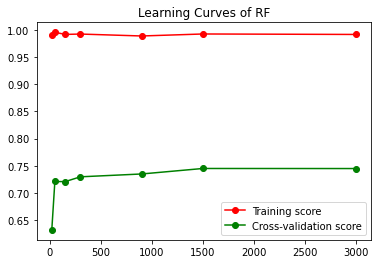

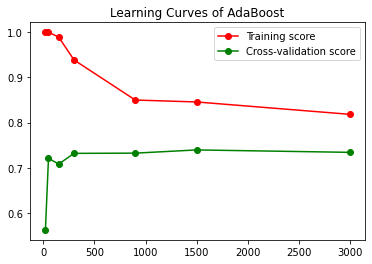

42


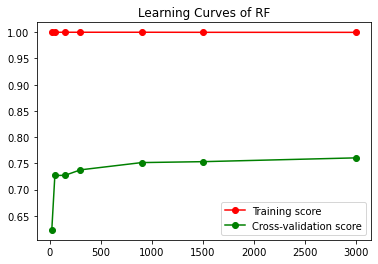

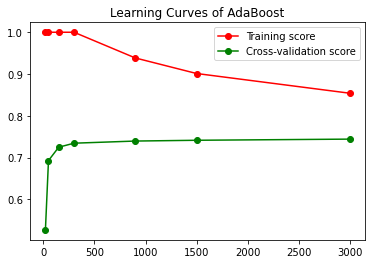

74


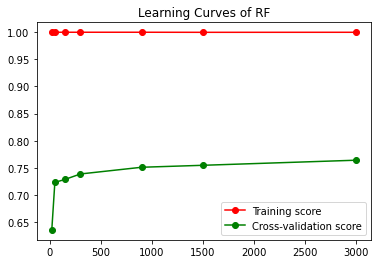

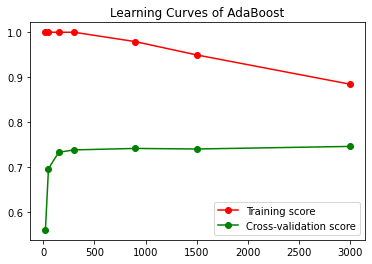

106


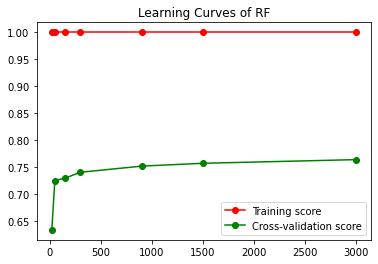

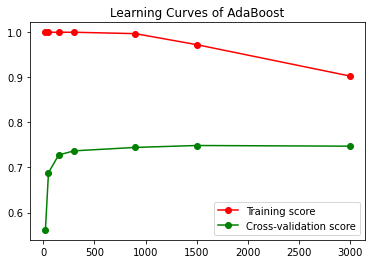

138


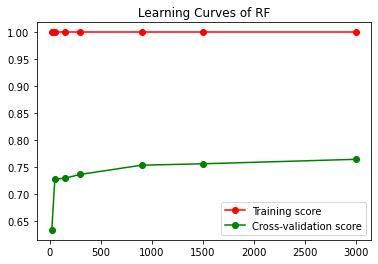

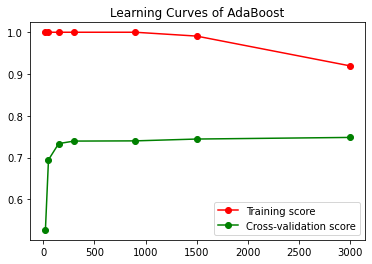

171


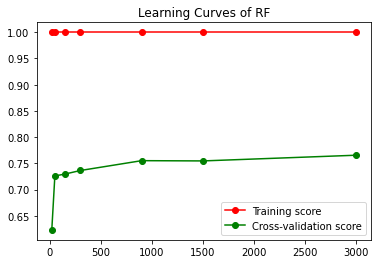

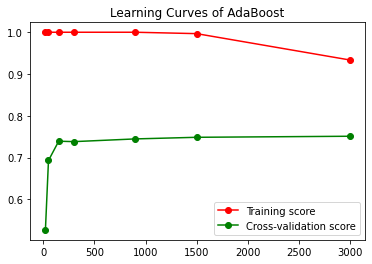

203


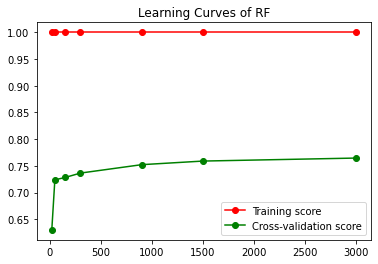

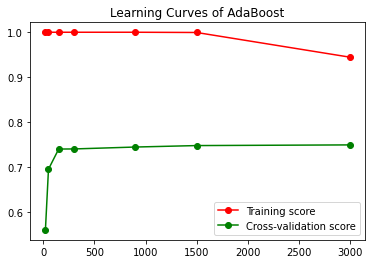

235


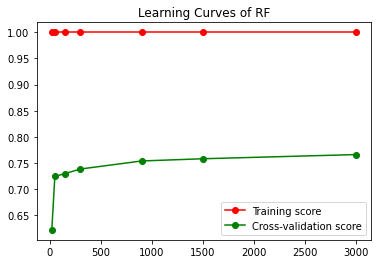

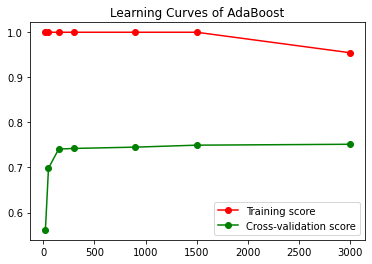

267


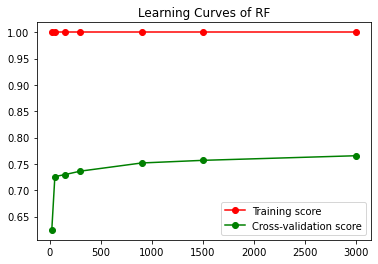

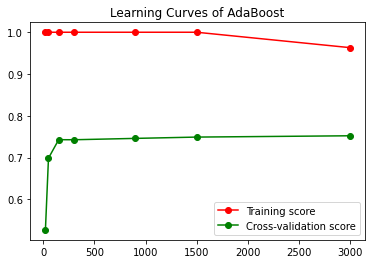

300


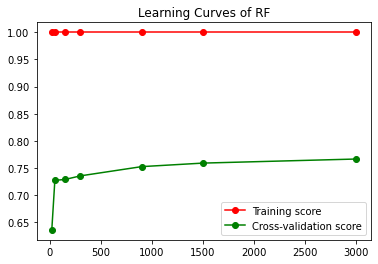

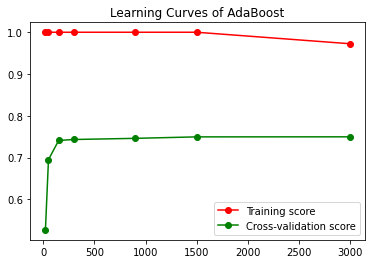

fold
10


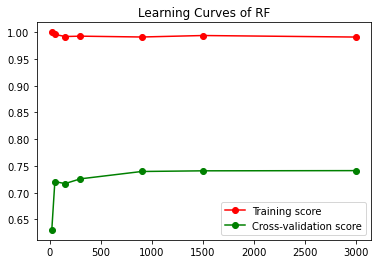

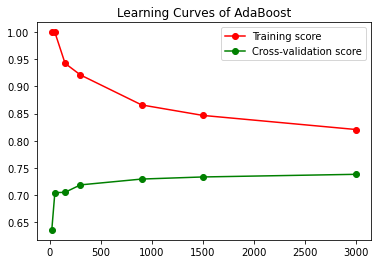

42


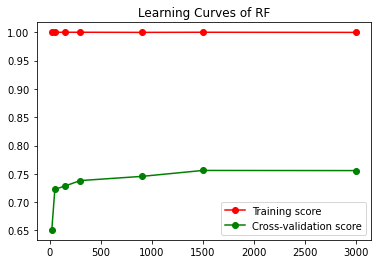

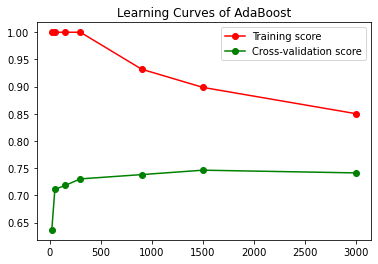

74


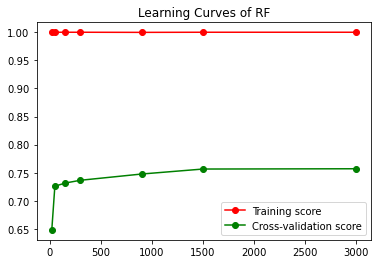

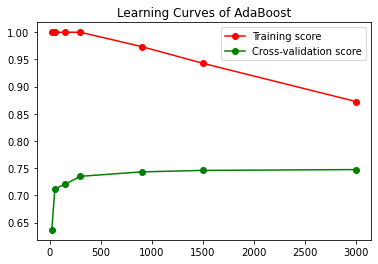

106


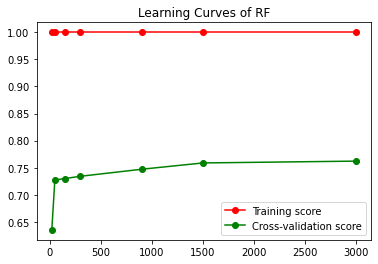

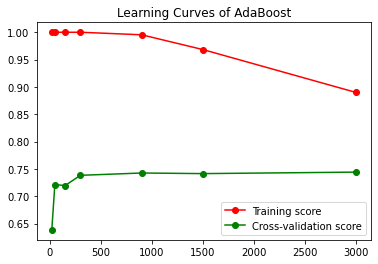

138


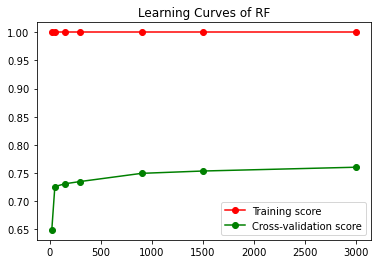

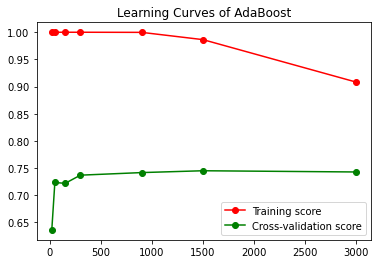

171


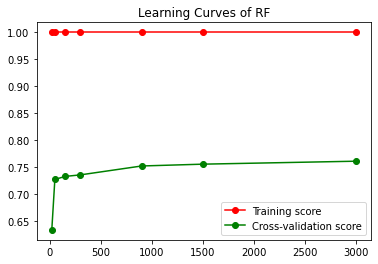

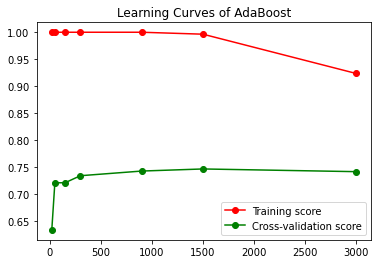

203


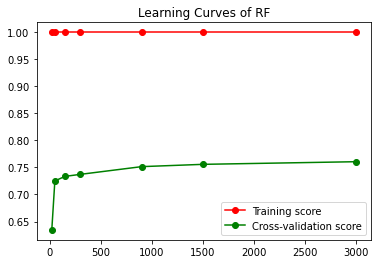

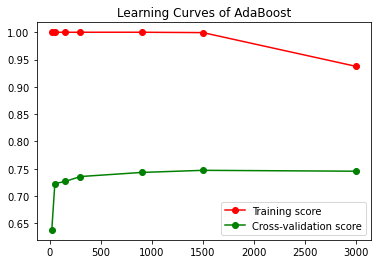

235


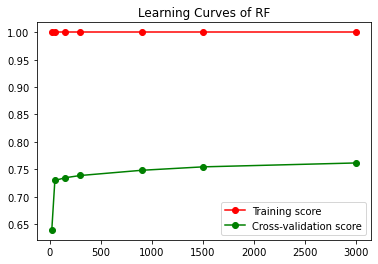

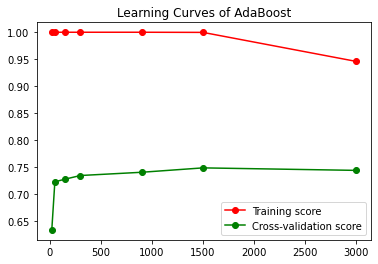

267


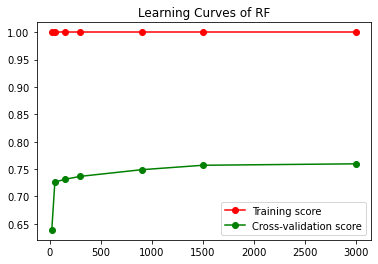

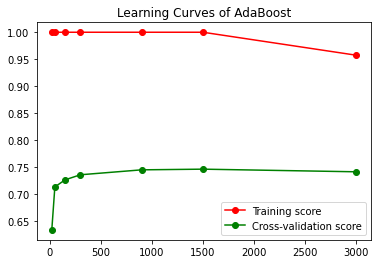

300


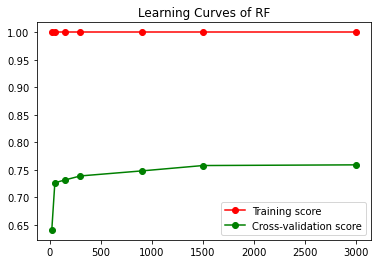

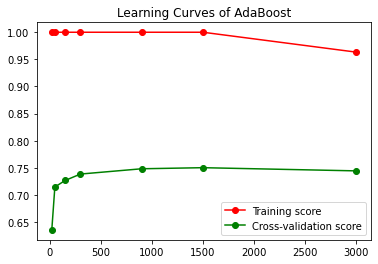

fold
10


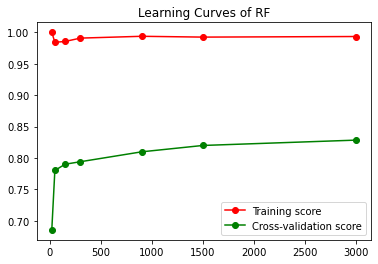

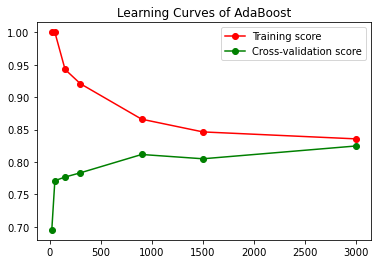

42


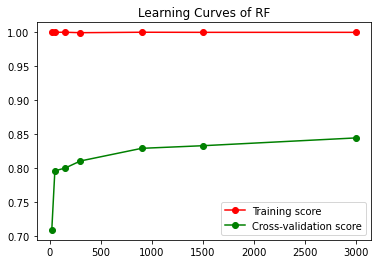

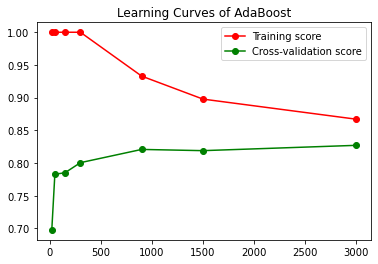

74


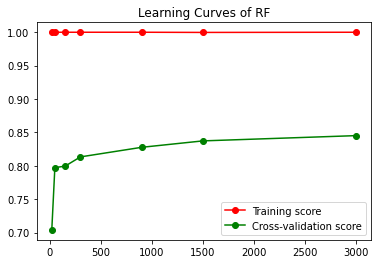

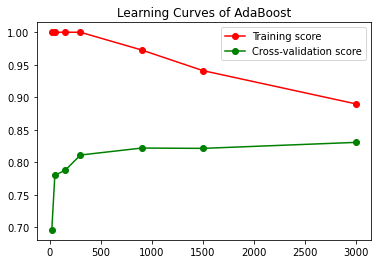

106


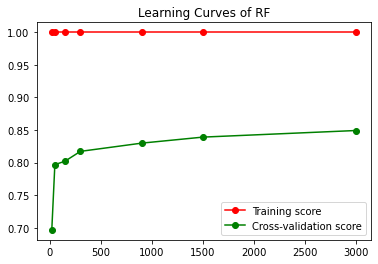

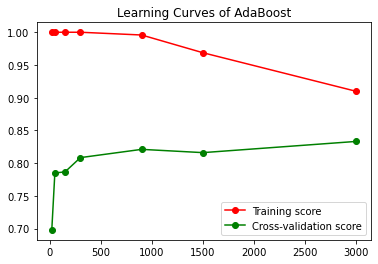

138


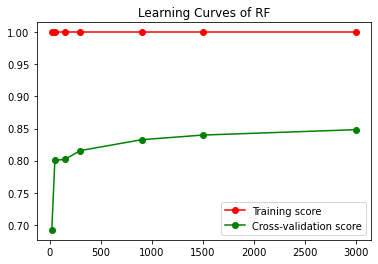

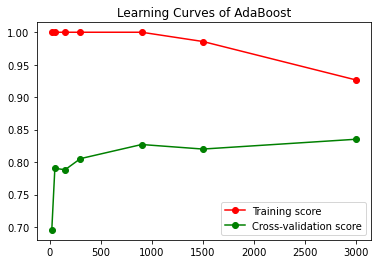

171


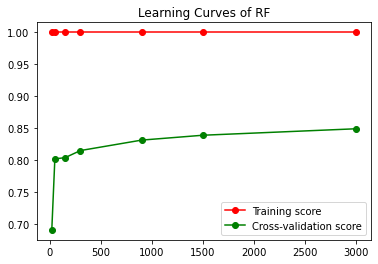

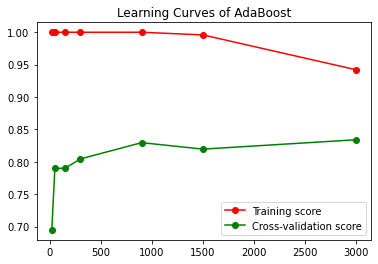

203


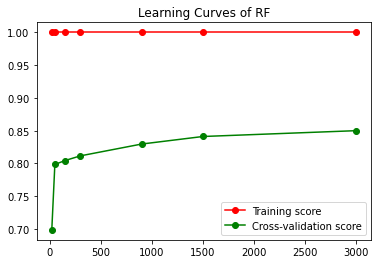

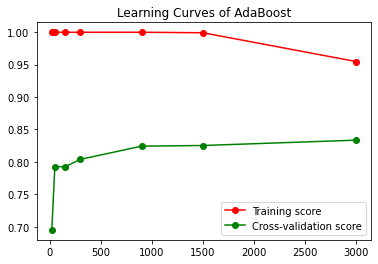

235


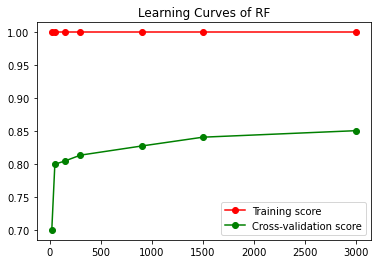

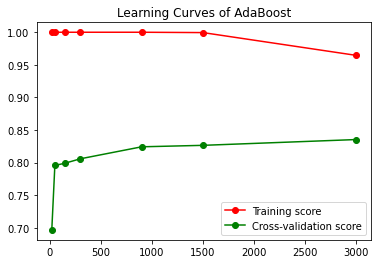

267


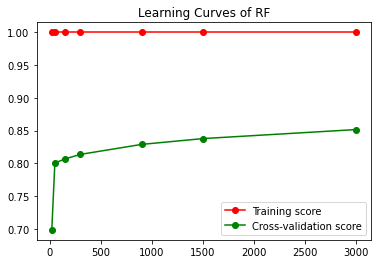

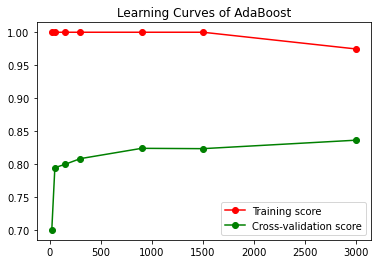

300


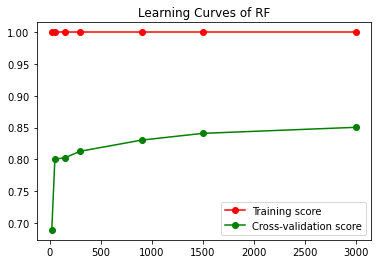

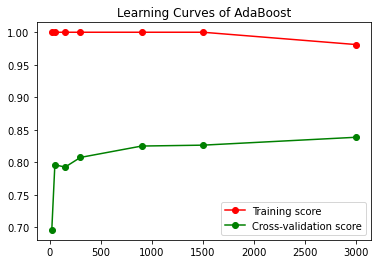

In [5]:
#Regulrization optimization in RF and ADAboost on HOG
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5,random_state=None, shuffle=False)
N=np.linspace(10, 300,10)
RF_models_result =  list()
RF_hyperameter_result=list()
ADA_models_result =  list()
ADA_hyperameter_result=list()
for train_index, test_index in kfold.split(Xtr):
    X_train, X_test = Xtr[train_index], Xtr[test_index]
    y_train, y_test = Ytr[train_index], Ytr[test_index]
    print("fold")
    for i in N:
        print(int(i))
        xtr_vector=Extract_Features_Hog(X_train,6,2,2)
        xte_vector=Extract_Features_Hog(X_test,6,2,2)
        rf = RandomForestClassifier(n_estimators=int(i))
        rf2 = rf.fit(X_train, y_train)
        y_pred=rf2.predict(X_test)
        RF_models_result.append(accuracy_score(y_test, y_pred))
        RF_hyperameter_result.append(int(i))
        adaboost=AdaBoostClassifier(n_estimators=int(i))
        adaboost2 = adaboost.fit(X_train, y_train)
        y_pred=adaboost2.predict(X_test)
        ADA_models_result.append(accuracy_score(y_test, y_pred))
        ADA_hyperameter_result.append(int(i))
        df=pd.DataFrame(columns=['a', 'b', 'c','d'])
        df['a']=(RF_hyperameter_result) 
        df['b']=(RF_models_result) 
        df['c']=(ADA_hyperameter_result) 
        df['d']=(ADA_models_result) 
        df.to_csv("models.csv")

        train_sizes, train_scores, valid_scores = learning_curve(rf2, X_train, y_train, train_sizes=[20,50,150,300,900,1500,3000], cv=None)
        train_scores_mean = np.mean(train_scores, axis=1)
        #train_scores_std = np.std(train_scores, axis=1)
        valid_scores_mean = np.mean(valid_scores, axis=1)
        #test_scores_std = np.std(test_scores, axis=1)
        plt.title('Learning Curves of RF')
        plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
        plt.plot(train_sizes, valid_scores_mean, 'o-', color="g",label="Cross-validation score")
        plt.legend()
        plt.show()

        plt.title('Learning Curves of AdaBoost')
        train_sizes, train_scores, valid_scores = learning_curve(adaboost2, X_train, y_train, train_sizes=[20,50,150,300,900,1500,3000], cv=None)
        train_scores_mean = np.mean(train_scores, axis=1)
        #train_scores_std = np.std(train_scores, axis=1)
        valid_scores_mean = np.mean(valid_scores, axis=1)
        #test_scores_std = np.std(test_scores, axis=1)
        plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
        plt.plot(train_sizes, valid_scores_mean, 'o-', color="g",label="Cross-validation score")
        plt.legend()
        plt.show()


In [6]:
#Lambda Optimization For RF Results
rf_dict = defaultdict(float)
ada_dict = defaultdict(float)
models=pd.read_csv("models.csv")
for  index,x in enumerate(models["a"]):
    rf_dict[x]=(models["b"].iloc[index]+rf_dict[x])
for key,value in rf_dict.items():
    print("No of Trees for RF=      "+str(key)+"    Mean Acc=        "+str(value/2))
key_max = max(rf_dict.keys(), key=(lambda k: rf_dict[k]))
print("Best Optimized value for RF=      "+str(key_max))

No of Trees for RF=      10    Mean Acc=        0.8049999999999999
No of Trees for RF=      42    Mean Acc=        0.847625
No of Trees for RF=      74    Mean Acc=        0.85175
No of Trees for RF=      106    Mean Acc=        0.8565
No of Trees for RF=      138    Mean Acc=        0.85675
No of Trees for RF=      171    Mean Acc=        0.8605
No of Trees for RF=      203    Mean Acc=        0.85875
No of Trees for RF=      235    Mean Acc=        0.857625
No of Trees for RF=      267    Mean Acc=        0.86025
No of Trees for RF=      300    Mean Acc=        0.8603750000000001
Best Optimized value for RF=      171


In [8]:
#Lambda Optimization For Adaboost Results
ada_dict = defaultdict(float)
models=pd.read_csv("models.csv")
for  index,x in enumerate(models["c"]):
    ada_dict[x]=(models["d"].iloc[index]+ada_dict[x])
for key,value in ada_dict.items():
    print("No of Trees for ada=      "+str(key)+"     Mean Acc=        "+str(value/2))
key_max = max(ada_dict.keys(), key=(lambda k: ada_dict[k]))
print("Best Optimized value for ada=      "+str(key_max))

No of Trees for ada=      10     Mean Acc=        0.817
No of Trees for ada=      42     Mean Acc=        0.825
No of Trees for ada=      74     Mean Acc=        0.819375
No of Trees for ada=      106     Mean Acc=        0.820375
No of Trees for ada=      138     Mean Acc=        0.8222499999999999
No of Trees for ada=      171     Mean Acc=        0.822
No of Trees for ada=      203     Mean Acc=        0.82075
No of Trees for ada=      235     Mean Acc=        0.820875
No of Trees for ada=      267     Mean Acc=        0.81675
No of Trees for ada=      300     Mean Acc=        0.817125
Best Optimized value for ada=      42


fold
1


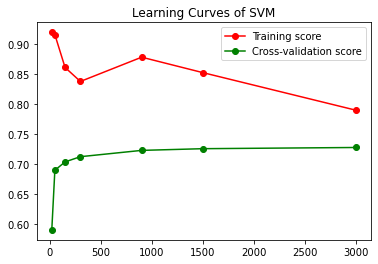

2


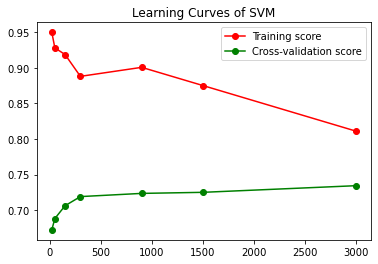

3


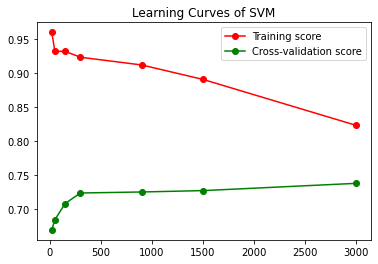

4


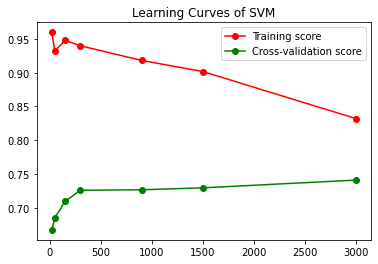

5


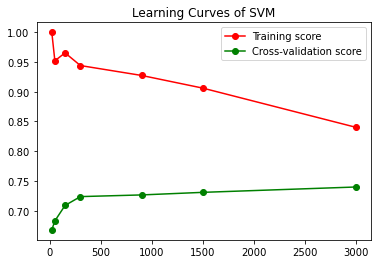

6


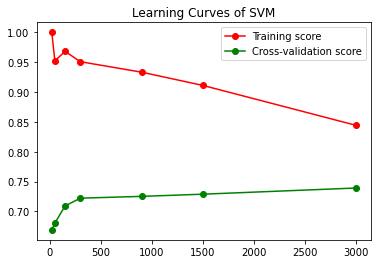

fold
1


C:\Users\Umair\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Umair\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Umair\anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Umair\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 164, in fit
    y = self._validate_targets(y)
  File "C:\Users\Umair\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 549, in _validate_targets
    raise ValueError(
ValueError: The number of classes has to be greater than one; got 1 class

  warnings.warn("Estimator fit failed. The score on this train-test"


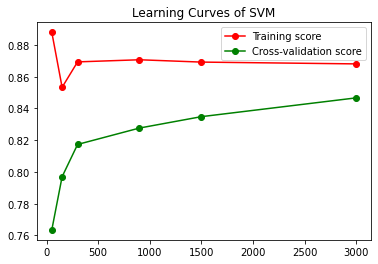

2


C:\Users\Umair\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Umair\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Umair\anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Umair\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 164, in fit
    y = self._validate_targets(y)
  File "C:\Users\Umair\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 549, in _validate_targets
    raise ValueError(
ValueError: The number of classes has to be greater than one; got 1 class

  warnings.warn("Estimator fit failed. The score on this train-test"


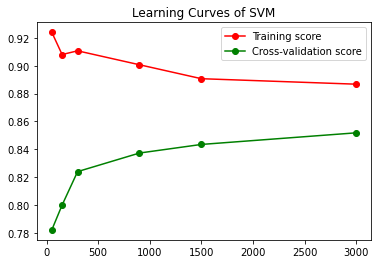

3


C:\Users\Umair\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Umair\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Umair\anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Umair\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 164, in fit
    y = self._validate_targets(y)
  File "C:\Users\Umair\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 549, in _validate_targets
    raise ValueError(
ValueError: The number of classes has to be greater than one; got 1 class

  warnings.warn("Estimator fit failed. The score on this train-test"


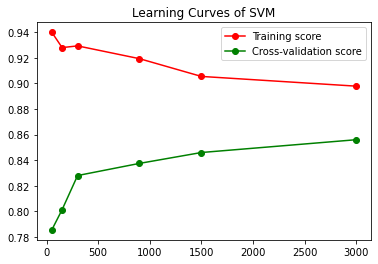

4


C:\Users\Umair\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Umair\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Umair\anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Umair\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 164, in fit
    y = self._validate_targets(y)
  File "C:\Users\Umair\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 549, in _validate_targets
    raise ValueError(
ValueError: The number of classes has to be greater than one; got 1 class

  warnings.warn("Estimator fit failed. The score on this train-test"


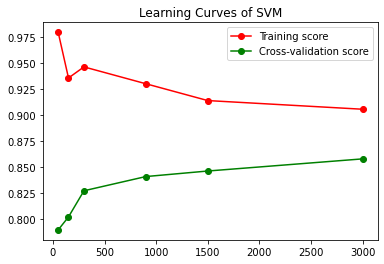

5


C:\Users\Umair\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Umair\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Umair\anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Umair\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 164, in fit
    y = self._validate_targets(y)
  File "C:\Users\Umair\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 549, in _validate_targets
    raise ValueError(
ValueError: The number of classes has to be greater than one; got 1 class

  warnings.warn("Estimator fit failed. The score on this train-test"


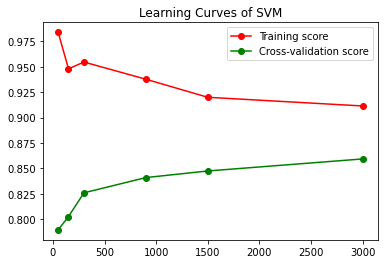

6


C:\Users\Umair\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Umair\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Umair\anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Umair\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 164, in fit
    y = self._validate_targets(y)
  File "C:\Users\Umair\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 549, in _validate_targets
    raise ValueError(
ValueError: The number of classes has to be greater than one; got 1 class

  warnings.warn("Estimator fit failed. The score on this train-test"


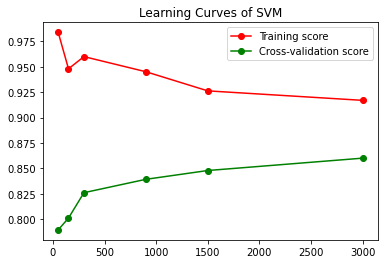

In [19]:
#Regulrization optimization in SVM 
from sklearn.model_selection import KFold
kfold = KFold(n_splits=2,random_state=None, shuffle=False)
C=[1,2,3,4,5,6]
svm_models_result =  list()
svm_hyperameter_result=list()
for train_index, test_index in kfold.split(Xtr):
    X_train, X_test = Xtr[train_index], Xtr[test_index]
    y_train, y_test = Ytr[train_index], Ytr[test_index]
    print("fold")
    for i in C:
        print(i)
        xtr_vector=Extract_Features_Hog(X_train,6,2,2)
        xte_vector=Extract_Features_Hog(X_test,6,2,2)
        svm_clf = make_pipeline(StandardScaler(), SVC(C=i,gamma='auto'))
        svm_clf.fit(xtr_vector, y_train)
        Pipeline(steps=[('standardscaler', StandardScaler()),
                        ('svc', SVC(C=i,gamma='auto'))])
        y_pred=svm_clf.predict(xte_vector)
        accuracy_score(y_test, y_pred)
        svm_models_result.append(accuracy_score(y_test, y_pred))
        svm_hyperameter_result.append(i)
        df=pd.DataFrame(columns=['a', 'b'])
        df['b']=(svm_models_result) 
        df['c']=(svm_hyperameter_result)  
        df.to_csv("svm_model.csv")
        train_sizes, train_scores, valid_scores = learning_curve(svm_clf, xtr_vector, y_train, train_sizes=[20,50,150,300,900,1500,3000], cv=None)
        train_scores_mean = np.mean(train_scores, axis=1)
        #train_scores_std = np.std(train_scores, axis=1)
        valid_scores_mean = np.mean(valid_scores, axis=1)
        #test_scores_std = np.std(test_scores, axis=1)
        plt.title('Learning Curves of SVM')
        plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
        plt.plot(train_sizes, valid_scores_mean, 'o-', color="g",label="Cross-validation score")
        plt.legend()
        plt.show()

In [11]:
#Lambda Optimization For SVM Results
ada_dict = defaultdict(float)
models=pd.read_csv("svm_model.csv")
for  index,x in enumerate(models["c"]):
    ada_dict[x]=(models["b"].iloc[index]+ada_dict[x])
for key,value in ada_dict.items():
    print("Value of C =      "+str(key)+"     Mean Acc=        "+str(value/2))
key_max = max(ada_dict.keys(), key=(lambda k: ada_dict[k]))
print("Best Optimized value of C for SVM=      "+str(key_max))

Value of C =      1     Mean Acc=        0.833
Value of C =      2     Mean Acc=        0.843166667
Value of C =      3     Mean Acc=        0.846833333
Value of C =      4     Mean Acc=        0.848166667
Value of C =      5     Mean Acc=        0.8605833329999999
Value of C =      6     Mean Acc=        0.836333333
Best Optimized value of C for SVM=      5
